<a href="https://colab.research.google.com/github/jiw3026/baseline_/blob/main/01_8_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2_%E1%84%86%E1%85%A9%E1%84%83%E1%85%A6%E1%86%AF_%E1%84%8B%E1%85%B5%E1%84%92%E1%85%A2(Gradient_Boosting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# colab 한글깨짐 해결위한 설치
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

In [ ]:
# matplotlib 설정
from matplotlib import pyplot as plt
from matplotlib import rc

%matplotlib inline

# # mac OS 한글 깨짐 해결
# rc('font', family = 'AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

# colab 한글이 깨짐 해결
from matplotlib import font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
fm._rebuild()

# 런타임 다시 시작해야 한글 깨짐 해결가능!!!!

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Gradient Boosting

`GradientBoosting`
* Decision Tree 의 대표적인 Boosting 모델 중 하나이다.
* CART 기반의 알고리즘으로 분류와 회귀가 모두 가능하며, 회귀 분석에 강점을 보인다.
* 잔차를 새로운 학습기에 학습시켜 잔차를 줄여나가는 방식으로 학습을 하기 때문에 과적합이 잘 일어나는 단점이 있다. 


작동 과정

1. 원본 데이터를 학습시켜 loss function을 최소화하는 base 학습기를 생성한다. 이를 통해 가장 초기의 예측치를 만들어 낸다.


회귀분석일 경우의 loss function:

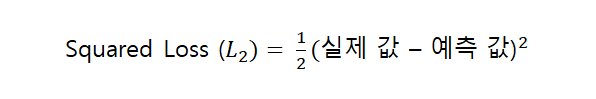

출처: https://dailyheumsi.tistory.com/116

분류일 경우의 loss function:

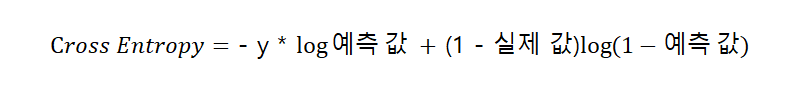

2. 이전 예측치와 실제 값을 비교하여 잔차(= loss function의 -기울기)를 계산한다.


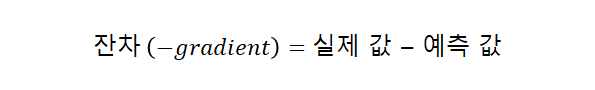

출처: https://ichi.pro/ko/bunlyuleul-wihan-geuladieonteu-buseuting-teuli-choboja-gaideu-98317594399978

3. 잔차를 학습시켜 잔차를 예측하는 학습기를 생성한다.
4. 기존 예측 값에 잔차*learning rate을 더하여 새로운 예측 값으로 업데이트한다.
5. 2-4 과정을 K번 반복한다.
6. K개의 학습기를 결합하여 예측을 수행한다.

부스팅 계열의 대표적인 알고리즘인 Ada Boost와 Gradient Boost를 비교해보자.

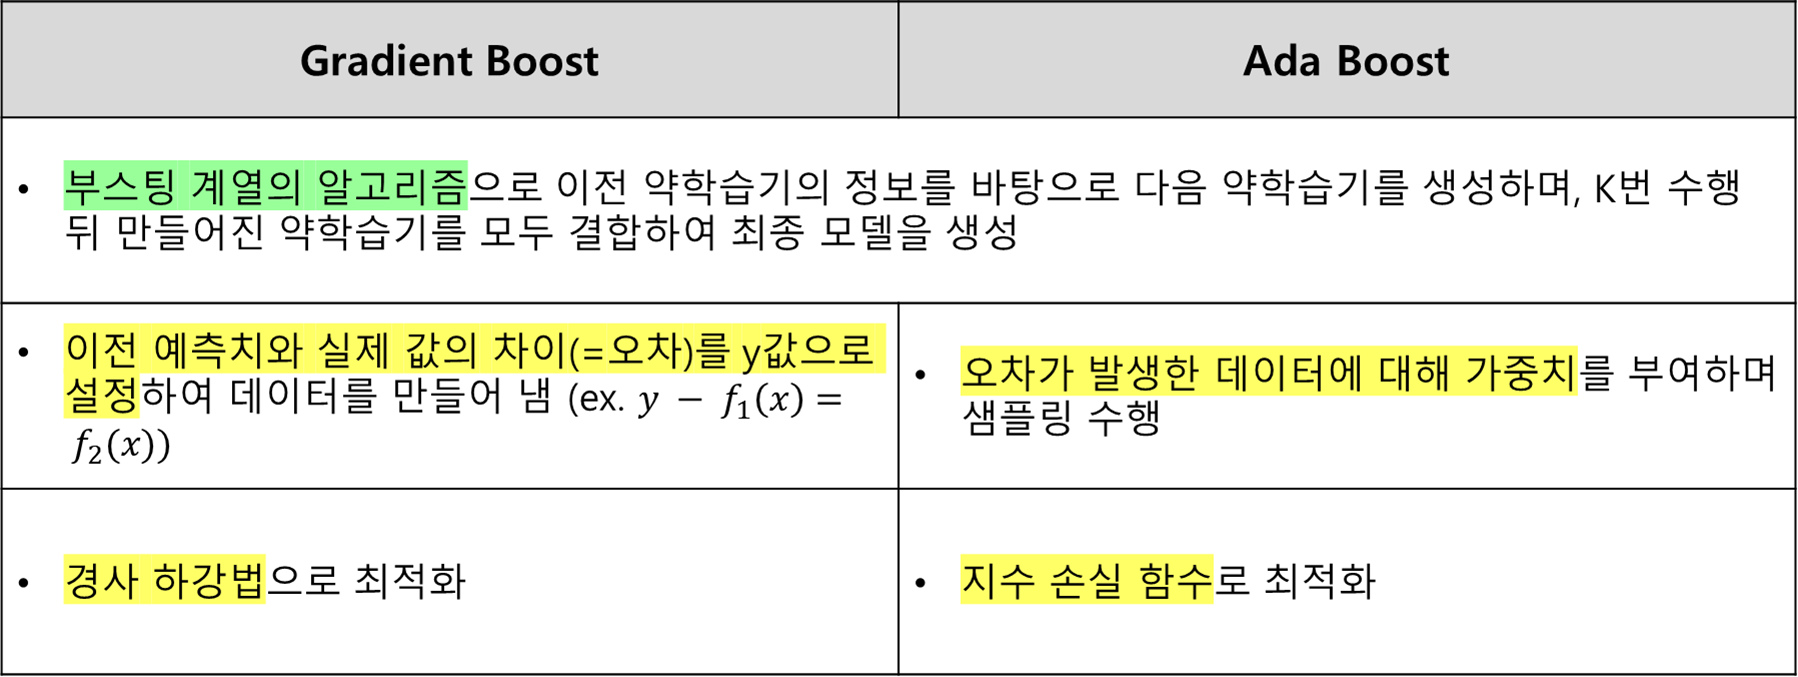

In [ ]:
# 라이브러리 import
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
%matplotlib inline

## 1) 유방암 데이터 생성

위스콘신 대학교에서 제공한 유방암 진단결과 데이터이다.  

feature  
* 양성(benign, 0)과 악성(malignant, 1)을 구분할 수 있는 종양의 크기, 모양 등의 다양한 특성값을 가진다.
* `mean_` : 1 ~ 10번째 feature는 특성별 평균값을 의미한다.
* `_error` : 11 ~ 20번째 feature는 특성별 표준오차(Standard Error)를 의미한다.
* `worst_` : 21 ~ 30번째까지는 각 종양의 특성들에서 제일 큰 3개의 값을 평균낸 값을 의미한다.


<a title="Preethi Sekar, Jyotsna Naresh Bharti, Jitendra Singh Nigam, Ankit Sharma, and Priyanka Bhatia Soni, CC BY 3.0 &lt;https://creativecommons.org/licenses/by/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg"><img width="512" alt="Micrograph of ductal carcinoma with marked nuclear pleomorphism and increased mitotic rate" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg/512px-Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg"></a>

<a href="https://commons.wikimedia.org/wiki/File:Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg">Preethi Sekar, Jyotsna Naresh Bharti, Jitendra Singh Nigam, Ankit Sharma, and Priyanka Bhatia Soni</a>, <a href="https://creativecommons.org/licenses/by/3.0">CC BY 3.0</a>, via Wikimedia Commons

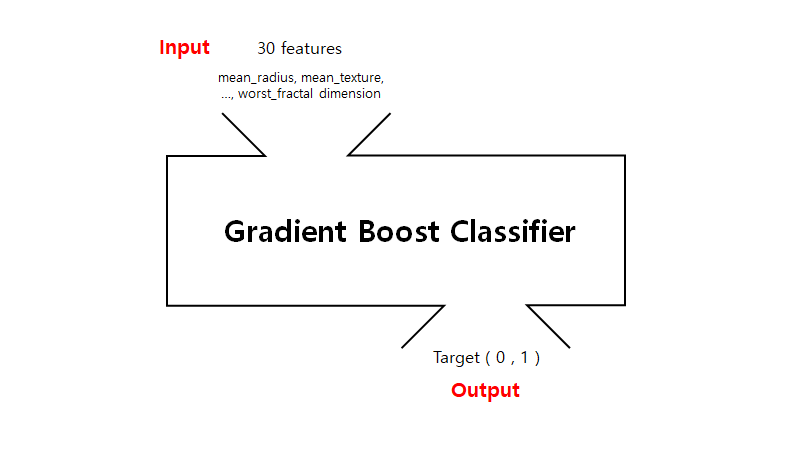

In [ ]:
# 유방암 data를 불러온 후, cancer 변수에 담아보자.
cancer = load_breast_cancer()

# 유방암 data를 학습용과 검증용 데이터 세트로 분리해보자.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    random_state = 0)

## 2) Gradient Boosting Classifier 생성

`GradientBoostingClassifier(loss', learning_rate, n_estimators, subsample,  min_samples_leaf, max_depth)`
* 사이킷런 ensemble 라이브러리에서 GradientBoostingClassifier 클래스를 제공하고 있다.
* 사이킷런에서 제공하는 GradientBoostingClassifier와 GradientBoostingRegressor모두 DecisionTreeRegressor를 사용하여 구현되어 있다.

주요 paramter
  - `loss` : 'deviance'와 'exponential' 중에서 선택 가능, 'deviance'은 로지스틱 손실 함수이고 'exponential'는 에이다부스트에서 사용하는 손실 함수로 지수 손실 함수임, (기본 값='deviance)
    - GradientBoostingRegressor에도 loss파라미터가 존재하는데 기본값은 'ls(최소제곱)'이고, 그 외에도'lad(최소 절댓값 오차)', 'huber(후버 손실함수)', 'quantile(사분위수 손실함수)'가 있음.
  - `learning_rate` : 에이다 부스트의 파라미터와 비슷하게 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 정해주는 파라미터. 0~1 사이의 값을 가지며, 너무 작은 값을 설정하면 업데이트 되는 값이 작아져 수행시간이 오래 걸릴 수 있음, (기본 값=0.1)
  - `n_estimators`: 약한 학습기의 개수 (기본 값=100)
  - `subsample` : 각 트리가 훈련할 때 사용할 데이터의 비율을 지정. 'subsample = 0.3'이면 각 트리는 무작위로 선택된 30%의 훈련 데이터로 학습함. (기본 값=1.0)
  - 결정 트리를 제어하는 파라미터인 `max_depth` (기본 값=3), `min_samples_leaf`(기본 값=1) 등을 가지고 있음.

참고: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [ ]:
# Gradient Booting classifier을 로드한 뒤 학습시켜보자.
model_grad = GradientBoostingClassifier(random_state = 0).fit(X_train, y_train)

In [ ]:
# train score, test score을 출력해보자.
print('train score : {:.3f}'.format(model_grad.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_grad.score(X_test, y_test)))

train score : 1.000
test score : 0.965


In [ ]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# train score, test score을 출력해보자.
print('train score : {:.3f}'.format(log_model.score(X_train, y_train)))
print('test score : {:.3f}'.format(log_model.score(X_test, y_test)))

train score : 0.958
test score : 0.944


- 훈련 점수가 1.0으로 과적합을 보이고 있다.

In [ ]:
model_grad.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7F7443981B40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7F7443981B40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7F7443981B40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7F7443981B40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7F7443981B40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7F7443981B40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
       

In [ ]:
# 첫번째 esimator을 출력해보자. 
model_grad.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x7F7443981B40)],
      dtype=object)

* 분류 작업이라도 estimator은 회귀 트리이다. Gredient Boosting은 연속형 수치인 기울기를 계산하여야 하기 때문이다.

### 2-1. max_depth

- 과적합을 막기 위해서 max_depth(트리의 깊이)를 1로 설정했다. 모델의 점수를 확인해보니 훈련 점수는 낮아지고 테스트 점수는 높아진 것을 확인할 수 있다.

In [ ]:
# max_depth = 3 (기본 값)
print('train score : {:.3f}'.format(model_grad.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_grad.score(X_test, y_test)))

train score : 1.000
test score : 0.965


In [ ]:
# max_depth = 1 (변경)
model_grad1 = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)
print('train score : {:.3f}'.format(model_grad1.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_grad1.score(X_test, y_test)))

train score : 0.991
test score : 0.972


### 2-2. learning_rate

- 학습률을 낮추는 방법으로도 과적합을 방지할 수 있다.

In [ ]:
# learning_rate = 0.1 (기본 값)
print('train score : {:.3f}'.format(model_grad.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_grad.score(X_test, y_test)))

train score : 1.000
test score : 0.965


In [ ]:
# learning_rate = 0.01 (변경)
model_grad001 = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)
print('train score : {:.3f}'.format(model_grad001.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_grad001.score(X_test, y_test)))

train score : 0.988
test score : 0.965


## 4) 특성 중요도 시각화

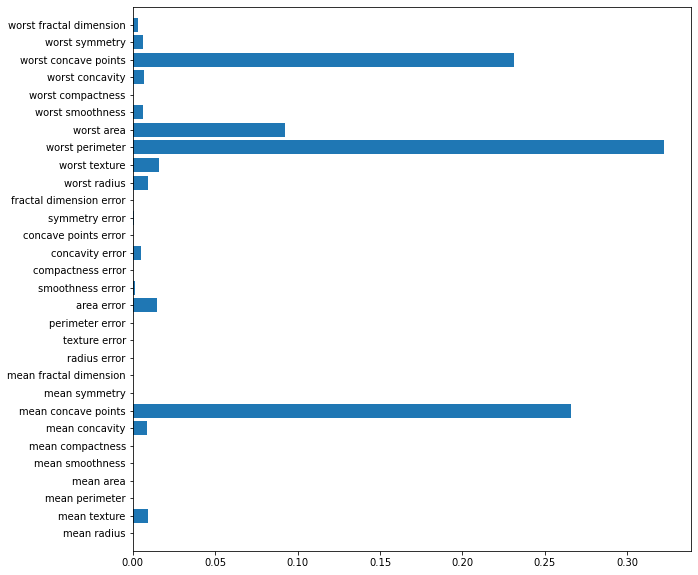

In [ ]:
# features importance를 시각화해보자. 
grbc = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

plt.figure(figsize = (10,10))
X = np.arange(cancer.data.shape[1])
Y = grbc.feature_importances_
plt.barh(X, Y, align='center')
plt.yticks(X, cancer.feature_names)
plt.ylim(-1, cancer.data.shape[1])
plt.show()

- 몇몇 특성들을 완전히 무시하고 있는 것을 확인할 수 있다.

- 그래디언트 부스팅의 단점은 파라미터를 잘 조정해야 하며 훈련 시간이 다른 모델에 비해 길다는 것이다.
- 그래디언트 부스팅은 n_estimators를 크게하면 모델이 복잡해져 과적합이 될 가능성이 크다. 따라서 적절한 n_estimaotrs와 learning_rate를 찾는것이 관건이다.

## 5) 심화 학습 (pseudocode)

    class GredientBoosting()
    학습 과정
        def fit(X, y):
        경사하강법을 활용하여 Weight를 조정하는 과정을 반복하여 예측성능 향상(비용 함수: squared loss/cross entropy 최소화)
            1) base 학습기를 생성한다.  
            2) 잔차(=실제값 - 마지막 예측값)를 계산한다. 
                2-1. 0으로 나누는 에러를 피하기 위해 엡실론 값을 지정해준다.
                2-2. 기울기(= - (실제 값 / 예측 값) + (1 - 실제 값) / (1 - 예측 값))을 return
            3) 학습기에 X 데이터와 잔차(target)를 학습시킨다. 
            4) 예측을 수행한다.
            5) 마지막 예측치에 i 번째 학습기로 구한 잔차(=negative gradient)*learning rate를 더하여 예측 값을 업데이트 한다.
            6) n_estimators 개수의 학습기에 대하여 2-5 과정을 반복한다.

    예측 과정
        def predict(X)
            1) 학습된 Weight값과 입력받은 데이터를 곱하여 잔차에 대한 예측을 수행한다.
            2) 마지막 예측치에 i 번째 학습기로 구한 잔차(=negative gradient)를 더하여 예측 값을 업데이트 한다.
            3) 분류일 경우:
                3-1. 로그 값인 예측치를 확률 값으로 변환한다.
                3-2. 확률 값에 따라 레이블을 설정한다.
            4) 학습된 모든 학습기에 대하여 1-3 과정을 반복한다.
            5) 예측 값을 return



출처: https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/supervised_learning/gradient_boosting.py

In [ ]:
import numpy as np

# Import helper functions
from mlfromscratch.utils import train_test_split, standardize, to_categorical
from mlfromscratch.utils import mean_squared_error, accuracy_score

# 결정나무 회귀
class RegressionTree(DecisionTree):
    def _calculate_variance_reduction(self, y, y1, y2):
        var_tot = calculate_variance(y)
        var_1 = calculate_variance(y1)
        var_2 = calculate_variance(y2)
        frac_1 = len(y1) / len(y)
        frac_2 = len(y2) / len(y)

        variance_reduction = var_tot - (frac_1 * var_1 + frac_2 * var_2)

        return sum(variance_reduction)

    def _mean_of_y(self, y):
        value = np.mean(y, axis=0)
        return value if len(value) > 1 else value[0]

    def fit(self, X, y):
        self._impurity_calculation = self._calculate_variance_reduction
        self._leaf_value_calculation = self._mean_of_y
        super(RegressionTree, self).fit(X, y)

# SquareLoss 계산
class SquareLoss(Loss):
    def __init__(self): pass
    # 손실(= 0.5 + (실제 값 - 예측 값)^2)을 return
    def loss(self, y, y_pred):
        return 0.5 * np.power((y - y_pred), 2)
    # 기울기 (= -(실제 값 - 예측 값))을 return
    def gradient(self, y, y_pred):
        return -(y - y_pred)

# 교차 엔트로피 계산
class CrossEntropy(Loss):
    def __init__(self): pass

    def loss(self, y, p):
        # 1) 0으로 나누는 에러를 피하기 위해 엡실론 값을 지정해준다.
        p = np.clip(p, 1e-15, 1 - 1e-15)
        # 2) 손실(= - y * np.log(예측 값) - (1 - 실제 값) * np.log(1 - 예측 값))을 return
        return - y * np.log(p) - (1 - y) * np.log(1 - p)

    def acc(self, y, p):
        return accuracy_score(np.argmax(y, axis=1), np.argmax(p, axis=1))

    def gradient(self, y, p):
        # 1) 0으로 나누는 에러를 피하기 위해 엡실론 값을 지정해준다.
        p = np.clip(p, 1e-15, 1 - 1e-15)
        # 2) 기울기(= - (실제 값 / 예측 값) + (1 - 실제 값) / (1 - 예측 값))을 return
        return - (y / p) + (1 - y) / (1 - p)

class GradientBoosting(object):

    def __init__(self, n_estimators, learning_rate, min_samples_split,
                 min_impurity, max_depth, regression):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.min_samples_split = min_samples_split
        self.min_impurity = min_impurity
        self.max_depth = max_depth
        self.regression = regression
        
        # 손실함수를 정의
        # 분류 모델일 경우 entropy, 회귀 모델일 경우 Sqaured Loss를 손실함수로 정의한다.
        self.loss = SquareLoss()
        if not self.regression:
            self.loss = CrossEntropy()

        # 학습기(회귀 트리)를 n_estimators 만큼 생성한다.
        self.trees = []
        for _ in range(n_estimators):
            tree = RegressionTree(
                    min_samples_split=self.min_samples_split,
                    min_impurity=min_impurity,
                    max_depth=self.max_depth)
            self.trees.append(tree)

# 학습 과정
    def fit(self, X, y):
        y_pred = np.full(np.shape(y), np.mean(y, axis=0))
        # 5) n_estimators 개수의 학습기에 대하여 1-4 과정을 반복한다.
        for i in range(self.n_estimators):
            # 1) 잔차(-기울기)를 계산한다. 
            gradient = self.loss.gradient(y, y_pred)
            # 2) 학습기에 X 데이터와 잔차(target)를 학습시킨다.
            self.trees[i].fit(X, gradient)
            # 3) 예측을 수행한다.
            update = self.trees[i].predict(X)
            # 4) 마지막 예측치에 i 번째 학습기로 구한 잔차(=negative gradient)를 더하여 예측 값을 업데이트 한다.
            y_pred -= np.multiply(self.learning_rate, update)

# 예측 과정
    def predict(self, X):
        y_pred = np.array([])
        # 4) 학습된 모든 학습기에 대하여 1-2 과정을 반복한다.
        for tree in self.trees:
            # 1) 잔차에 대한 예측을 수행한다.
            update = tree.predict(X)
            # 2)  마지막 예측치에 i 번째 학습기로 구한 잔차(=negative gradient)를 더하여 예측 값을 업데이트 한다.
            update = np.multiply(self.learning_rate, update)
            y_pred = -update if not y_pred.any() else y_pred - update
        # 3)분류일 경우: 
        if not self.regression:
            # 3-1. 로그 값인 예측치를 확률 값으로 변환한다.
            y_pred = np.exp(y_pred) / np.expand_dims(np.sum(np.exp(y_pred), axis=1), axis=1)
            # 3-2. 확률 값에 따라 레이블을 설정한다.
            y_pred = np.argmax(y_pred, axis=1)
        # 5) 예측 값을 return
        return y_pred


# Gradient Boosting 회귀 모델
class GradientBoostingRegressor(GradientBoosting):
    def __init__(self, n_estimators=200, learning_rate=0.5, min_samples_split=2,
                 min_var_red=1e-7, max_depth=4, debug=False):
        super(GradientBoostingRegressor, self).__init__(n_estimators=n_estimators, 
            learning_rate=learning_rate, 
            min_samples_split=min_samples_split, 
            min_impurity=min_var_red,
            max_depth=max_depth,
            regression=True)

# Gradient Boosting 분류 모델
class GradientBoostingClassifier(GradientBoosting):
    def __init__(self, n_estimators=200, learning_rate=.5, min_samples_split=2,
                 min_info_gain=1e-7, max_depth=2, debug=False):
        super(GradientBoostingClassifier, self).__init__(n_estimators=n_estimators, 
            learning_rate=learning_rate, 
            min_samples_split=min_samples_split, 
            min_impurity=min_info_gain,
            max_depth=max_depth,
            regression=False)

    def fit(self, X, y):
        y = to_categorical(y)
        super(GradientBoostingClassifier, self).fit(X, y)